# Imports

In [2]:
import os
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import imageio
import math

# Sierpiński gasket

*For more details, rules and analysis, please refer to [README](https://github.com/wielobel/Chaos-Game/blob/main/README.md)

##   1. Create initial points of the triangle <br>
    For simplicy and best effect let's go with the equilateral triangle 

In [3]:
def equilateral(sp: list, l: int) -> list:
    """
    Generate points of an equilateral triangle based on:
    sp: starting point
    l: desired side lenght
    """
    Ax = sp[0]
    Ay = sp[1]
    Bx = Ax + l
    By = Ay
    Cx = (Ax+Bx)/2
    Cy = math.sqrt(0.75*l**2) + Ay

    return([[Ax, Ay], [Bx, By], [Cx, Cy]])

(18.5, 51.5, 18.700961894323342, 47.27980021920982)

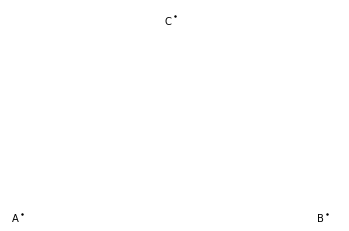

In [4]:
dt = equilateral([20,20],30)
df = pd.DataFrame(dt, columns = ['x', 'y'])
p = ['A', 'B', 'C']

fig, ax = plt.subplots(1)

ax.scatter(df.x, df.y, s=2, c = 'black', marker='o')
for i, x in enumerate(dt):
    ax.text(x[0]-1, x[1]-1, p[i])

ax.axis('off')

### Our starting points:

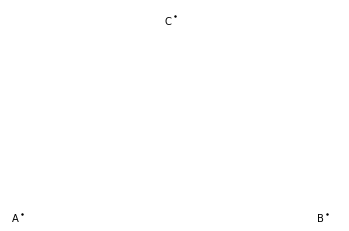

In [5]:
display(fig)

##   2. Generate points accoring to the chaos game rules <br>
    Starting in the point A (again, for simplicity)

In [6]:
# Create new list based on the original one
# We are going to add new random points to it
dt_add = dt

# starting in point A
position = dt[0]

# generating points
for i in range(1,10000):
    x = random.randint(0,2)
    goingto = dt[x]

    x = (goingto[0]+position[0])/2
    y = (goingto[1]+position[1])/2

    new_point = [x,y]
    position = [x,y]

    dt_add.append(new_point)


df_add = pd.DataFrame(dt_add, columns = ['x', 'y'])

##   3. Create a gif that will show gradual generation of the triangle <br>
    since we are woring with 10k points of data, one frame of the gif will
    be created for 10 new/additonal points. The gif itslef will be in 60 fps,
    so each second 600 new points will appear.

In [7]:

gif_name = 'triangle'
print('building plots\n')
plots = []

for i in range (1,10000,10):
    dt_temp = dt_add[0:i]    
    df_temp = pd.DataFrame(dt_temp, columns = ['x', 'y'])
    plt.scatter(df_temp.x, df_temp.y, s=0.1, c = 'black', marker='o', \
        edgecolors='none')

    plot = f'temp/frame_{i}.png'
    plots.append(plot)

    plt.axis('off')
    plt.savefig(plot)
    plt.close()

# Build GIF
print('creating gif\n')
with imageio.get_writer(f'{gif_name}.gif', mode='I',fps=60) as writer:
    for plot in plots:
        image = imageio.imread(plot)
        writer.append_data(image)
print('gif complete\n')
print('Removing Images\n')
# Remove files
for plot in set(plots):
    os.remove(plot)
print('done')

building plots

creating gif

gif complete

Removing Images

done


## 4. Final Result

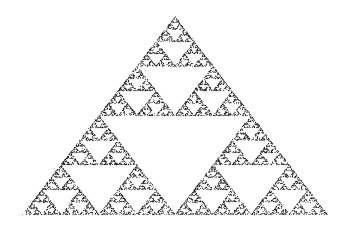

In [8]:
dt_temp = dt_add[0:10000]
df_temp = pd.DataFrame(dt_temp, columns = ['x', 'y'])
plt.scatter(df_temp.x, df_temp.y, s=0.1, c = 'black', marker='.')
plt.axis('off')
plt.show()

## 5. Variations of the intial rules: <br>
    The Sierpiński Gasket is the result of moving half of the way towards
    random point, however modifying this ratio will create different and
    interesting results

---------------------------------

In [ ]:
# setting up generator to point us into the right direction (we don't want to
# end up going to the same point again)

# or do we....

def direction(points):
    previous_value = None
    while True:
        value = random.choice(points)
        if value != previous_value:
            yield value
            previous_value = value



d = direction([0,1,2])
for i in range(1):
    print(next(d))


In [9]:
def make_plots(c:int, s:int):
    print('building plots\n')
    for i in range (1, c , s):
        dt_temp = dt_add[0:i]    
        df_temp = pd.DataFrame(dt_temp, columns = ['x', 'y'])
        plt.scatter(df_temp.x, df_temp.y, s=0.1, c = 'black', marker='o', \
            edgecolors='none')

        plot = f'temp/frame_{i}.png'
        plots.append(plot)

        plt.axis('off')
        plt.savefig(plot)
        plt.close()

def make_gif(name):
    # create gif
    print('creating gif\n')
    with imageio.get_writer(f'{name}.gif', mode='I',fps=60) as writer:
        for plot in plots:
            image = imageio.imread(plot)
            writer.append_data(image)
    print('gif complete\n')
    print('Removing Images\n')
    for plot in set(plots):
        os.remove(plot)
    print('done')

plots = []

make_plots(1000, 10)
make_gif('test')

building plots

creating gif

gif complete

Removing Images

done
